In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
print(df.dtypes)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.head(1)

Date                       object
priceUSD                  float64
size                      float64
sentbyaddress               int64
transactions                int64
mining_profitability      float64
sentinusd                 float64
transactionfees           float64
median_transaction_fee    float64
confirmationtime          float64
marketcap                   int64
transactionvalue          float64
mediantransactionvalue    float64
tweets                      int64
google_trends             float64
fee_to_reward             float64
activeaddresses             int64
top100cap                 float64
dtype: object
datetime64[ns]


,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month
0,2014-04-09,447.11,243742.0,122401,64992,38.678,239212041.0,0.139,0.0447,8.944,5587996110,4115.0,100.42,8193,11.193,0.502,179274,19.211,2014,4


In [29]:
from sklearn.preprocessing import MinMaxScaler

# crea una instancia del objeto MinMaxScaler
scaler = MinMaxScaler()

# normaliza las columnas size y sentbyaddress
df.iloc[:, 2:4] = scaler.fit_transform(df.iloc[:, 2:4])

# normaliza todas las columnas excepto la segunda (priceUSD)
df.iloc[:, 5:-1] = scaler.fit_transform(df.iloc[:, 5:-1])

# muestra los primeros cinco registros del dataframe para verificar que la normalización se haya aplicado correctamente
df.head(1)

,Date,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month
0,2014-04-09,447.11,0.097486,0.078112,64992,0.950115,0.000377,0.001831,0.001019,0.360238,0.002305,0.001204,0.018521,0.022535,0.009688,0.007213,0.149886,0.880875,0.0,4


In [30]:
import pandas as pd

# calcula la matriz de correlación
corr_matrix = df.corr()

# muestra la correlación entre tweets y precioUSD
print(corr_matrix.loc['tweets', 'priceUSD'])

0.7836828481154977


C:\Users\Administrador\AppData\Local\Temp\ipykernel_5524\279405187.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


c:\Users\Administrador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


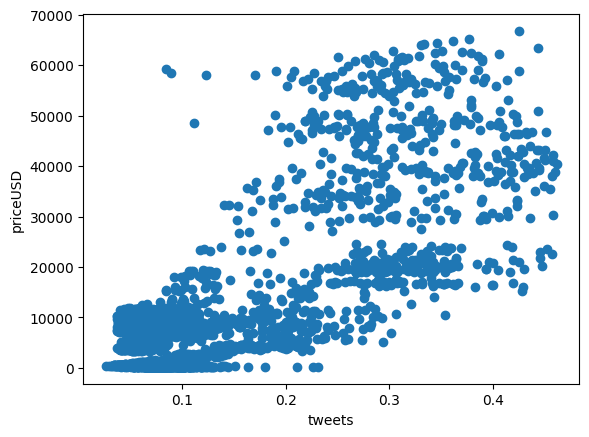

In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

X = df[['tweets']]

isof = IsolationForest(n_estimators=100, contamination=0.05, random_state=0)
isof.fit(X)

outlier_labels = isof.predict(X)

outlier_mask = outlier_labels == -1

df = df[~outlier_mask]

plt.scatter(df['tweets'], df['priceUSD'])
plt.xlabel('tweets')
plt.ylabel('priceUSD')
plt.show()

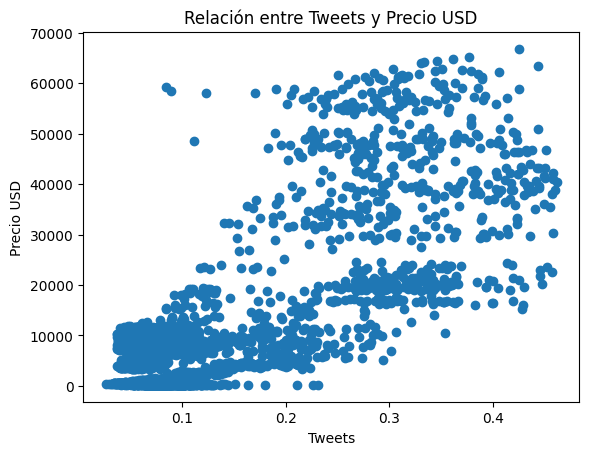

In [32]:
import matplotlib.pyplot as plt

# crea una figura y un eje
fig, ax = plt.subplots()

# grafica los puntos
ax.scatter(df['tweets'], df['priceUSD'])

# establece el título y los nombres de los ejes
ax.set_title('Relación entre Tweets y Precio USD')
ax.set_xlabel('Tweets')
ax.set_ylabel('Precio USD')

# muestra el gráfico
plt.show()